In [254]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree

In [255]:
##Codigo encontrado en https://stackoverflow.com/ para leer el archivo .arff
data = arff.loadarff('D:/Evaluacion/CreditCardPromotion.arff')
df = pd.DataFrame(data[0])
df.head()

,IncomeRange,MagazinePromo,WatchPromo,LifeInsPromo,CreditCardIns,Gender,Age
0,b'40-50000',b'Yes',b'No',b'No',b'No',b'Male',45.0
1,b'30-40000',b'Yes',b'Yes',b'Yes',b'No',b'Female',40.0
2,b'40-50000',b'No',b'No',b'No',b'No',b'Male',42.0
3,b'30-40000',b'Yes',b'Yes',b'Yes',b'Yes',b'Male',43.0
4,b'50-60000',b'Yes',b'No',b'Yes',b'No',b'Female',38.0


In [256]:
df = df.apply(lambda x: x.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x))
df.head()

,IncomeRange,MagazinePromo,WatchPromo,LifeInsPromo,CreditCardIns,Gender,Age
0,40-50000,Yes,No,No,No,Male,45.0
1,30-40000,Yes,Yes,Yes,No,Female,40.0
2,40-50000,No,No,No,No,Male,42.0
3,30-40000,Yes,Yes,Yes,Yes,Male,43.0
4,50-60000,Yes,No,Yes,No,Female,38.0


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IncomeRange    15 non-null     object 
 1   MagazinePromo  15 non-null     object 
 2   WatchPromo     15 non-null     object 
 3   LifeInsPromo   15 non-null     object 
 4   CreditCardIns  15 non-null     object 
 5   Gender         15 non-null     object 
 6   Age            15 non-null     float64
dtypes: float64(1), object(6)
memory usage: 972.0+ bytes


In [258]:
##Vamos a cambiar los nombres de las columnas
nuevos_nombres = {
    'IncomeRange': 'RangoIngresos',
    'MagazinePromo': 'PromoRevista',
    'WatchPromo': 'PromoReloj',
    'LifeInsPromo': 'PromoSeguroVida',
    'CreditCardIns': 'SeguroTarjetaCredito',
    'Gender': 'Genero',
    'Age': 'Edad'
}

df.rename(columns=nuevos_nombres, inplace=True)
df.head()

,RangoIngresos,PromoRevista,PromoReloj,PromoSeguroVida,SeguroTarjetaCredito,Genero,Edad
0,40-50000,Yes,No,No,No,Male,45.0
1,30-40000,Yes,Yes,Yes,No,Female,40.0
2,40-50000,No,No,No,No,Male,42.0
3,30-40000,Yes,Yes,Yes,Yes,Male,43.0
4,50-60000,Yes,No,Yes,No,Female,38.0


In [259]:
##Revisamos la informacion si no tenemos fatos faltantes o datos nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RangoIngresos         15 non-null     object 
 1   PromoRevista          15 non-null     object 
 2   PromoReloj            15 non-null     object 
 3   PromoSeguroVida       15 non-null     object 
 4   SeguroTarjetaCredito  15 non-null     object 
 5   Genero                15 non-null     object 
 6   Edad                  15 non-null     float64
dtypes: float64(1), object(6)
memory usage: 972.0+ bytes


In [260]:
df.isnull().sum()

RangoIngresos           0
PromoRevista            0
PromoReloj              0
PromoSeguroVida         0
SeguroTarjetaCredito    0
Genero                  0
Edad                    0
dtype: int64

* Edad (Age): La edad puede ser un factor importante. Por ejemplo, las personas mayores pueden estar más inclinadas a comprar un seguro de vida para asegurar el bienestar de sus seres queridos.
* Ingresos (IncomeRange): Los ingresos suelen estar relacionados con la capacidad de pagar una póliza 
* Promociones anteriores (MagazinePromo, WatchPromo, etc.): El historial de respuesta a promociones anteriores podría ser un indicador de la propensión a adquirir un seguro de vida. Si un cliente ha respondido positivamente a promociones.
* Género (Gender): el género puede influir en la decisión de adquirir un seguro de vida..

In [261]:
df.head()

,RangoIngresos,PromoRevista,PromoReloj,PromoSeguroVida,SeguroTarjetaCredito,Genero,Edad
0,40-50000,Yes,No,No,No,Male,45.0
1,30-40000,Yes,Yes,Yes,No,Female,40.0
2,40-50000,No,No,No,No,Male,42.0
3,30-40000,Yes,Yes,Yes,Yes,Male,43.0
4,50-60000,Yes,No,Yes,No,Female,38.0


In [262]:
a = {'Male':1,'Female':0}
b = {'Yes':1,'No':0}
df['PromoRevista'] = df['PromoRevista'].map(b)
df['PromoReloj'] = df['PromoReloj'].map(b)
df['PromoSeguroVida'] = df['PromoSeguroVida'].map(b)
df['SeguroTarjetaCredito'] = df['SeguroTarjetaCredito'].map(b)
df['Genero'] = df['Genero'].map(a)
df.head()

,RangoIngresos,PromoRevista,PromoReloj,PromoSeguroVida,SeguroTarjetaCredito,Genero,Edad
0,40-50000,1,0,0,0,1,45.0
1,30-40000,1,1,1,0,0,40.0
2,40-50000,0,0,0,0,1,42.0
3,30-40000,1,1,1,1,1,43.0
4,50-60000,1,0,1,0,0,38.0


In [263]:
df = pd.get_dummies(df, columns=['RangoIngresos'])

In [264]:
# Separar variables independientes (X) y variable objetivo (y)
X = df.drop('PromoSeguroVida', axis=1)  # Variables independientes
y = df['PromoSeguroVida']  # Variable objetivo

In [265]:
X.head()

,PromoRevista,PromoReloj,SeguroTarjetaCredito,Genero,Edad,RangoIngresos_20-30000,RangoIngresos_30-40000,RangoIngresos_40-50000,RangoIngresos_50-60000
0,1,0,0,1,45.0,False,False,True,False
1,1,1,0,0,40.0,False,True,False,False
2,0,0,0,1,42.0,False,False,True,False
3,1,1,1,1,43.0,False,True,False,False
4,1,0,0,0,38.0,False,False,False,True


In [266]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: PromoSeguroVida, dtype: int64

In [267]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [268]:
classiEntro = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
classiGini = tree.DecisionTreeClassifier(criterion='gini')#,random_state=0)

In [269]:
# Entrenar los modelos
classiEntro.fit(X_train, y_train)
classiGini.fit(X_train, y_train)

DecisionTreeClassifier()

In [270]:
# Calcular matrices de confusión
conf_matrix_impurity = confusion_matrix(y_test, classiEntro.predict(X_test))
conf_matrix_entropy = confusion_matrix(y_test, classiGini.predict(X_test))

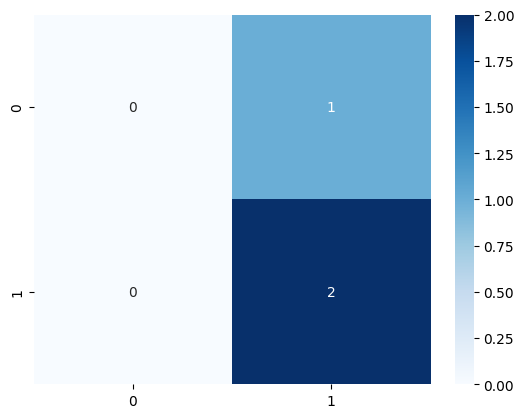

In [271]:
sns.heatmap(conf_matrix_impurity, annot=True, fmt='d', cmap='Blues');

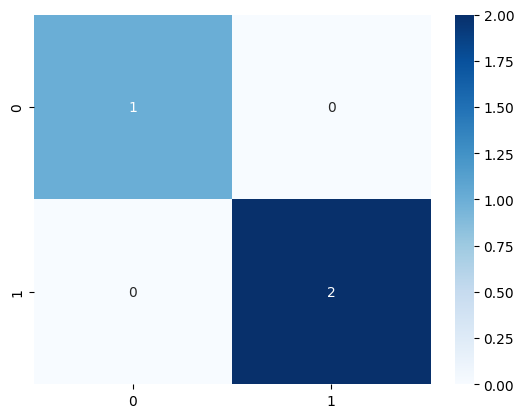

In [272]:
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Blues');

In [273]:
classiEntro.score(X_test,y_test)

0.6666666666666666

In [274]:
classiGini.score(X_test,y_test)

1.0

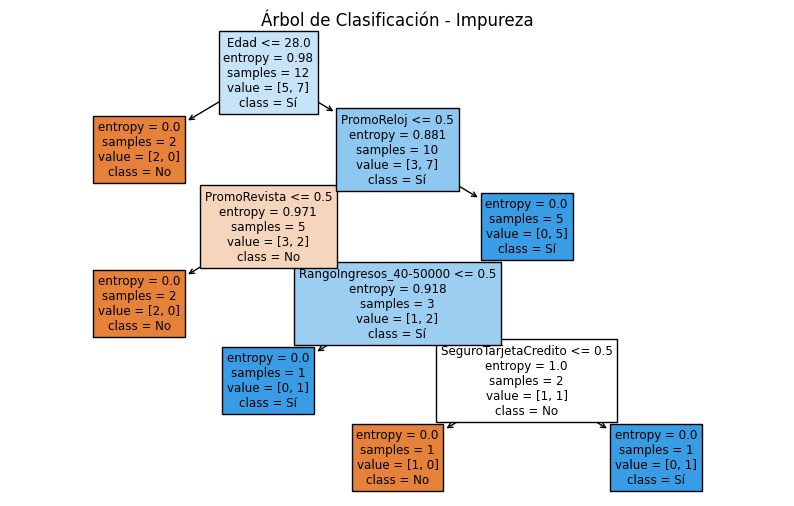

In [275]:
# Graficar árbol de clasificación resultante para los dos modelos
#classiEntro.fit(X_train, y_train)
#classiGini.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_tree(classiEntro, feature_names=X.columns, class_names=["No", "Sí"], filled=True)
plt.title("Árbol de Clasificación - Impureza");

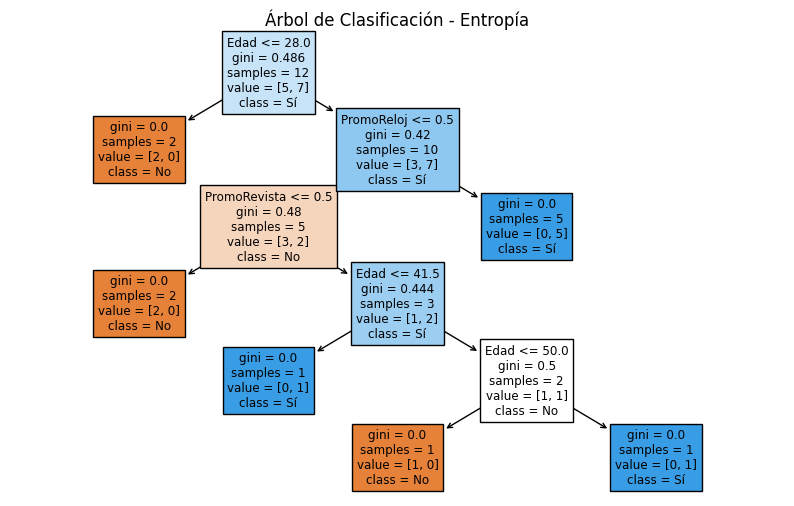

In [276]:
plt.figure(figsize=(10, 6))
plot_tree(classiGini, feature_names=X.columns, class_names=["No", "Sí"], filled=True)
plt.title("Árbol de Clasificación - Entropía");

* Un puntaje de precisión de aproximadamente 0.6666666 en ambos modelos de clasificación utilizando los criterios de Gini y Entropía sugiere que ambos modelos están clasificando correctamente alrededor del 66%

##  2.       Dada la siguiente Matriz de confusión, determine los valores de
* a,       b,       c
* 49,      1,       0   
* 0,       47,      3
* 0,       2,       48



        TP      TN      FP     FN
* a,       49,      100,     0,      1    
* b,       47,      97,      3,      3
* c,       48,      97,     3,      2


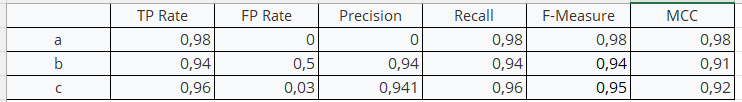

In [277]:
# Definir la matriz de confusión
conf_matrix = np.array([[49, 1, 0], [0, 47, 3], [0, 2, 48]])

# Calcular las métricas para cada clase
metrics = {}

for i, label in enumerate(['a', 'b', 'c']):
    TP = conf_matrix[i, i]
    FN = np.sum(conf_matrix[i, :]) - TP
    FP = np.sum(conf_matrix[:, i]) - TP
    TN = np.sum(conf_matrix) - TP - FN - FP

    TP_rate = TP / (TP + FN)
    FP_rate = FP / (FP + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F_measure = 2 * (Precision * Recall) / (Precision + Recall)
    MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    metrics[label] = {
        "TP Rate": TP_rate,
        "FP Rate": FP_rate,
        "Precision": Precision,
        "Recall": Recall,
        "F-Measure": F_measure,
        "MCC": MCC
    }
for label, metric in metrics.items():
    print(f"Metrics for Class {label}:")
    for metric_name, value in metric.items():
        print(f"{metric_name}: {value}")
    print()


Metrics for Class a:
TP Rate: 0.98
FP Rate: 0.0
Precision: 1.0
Recall: 0.98
F-Measure: 0.98989898989899
MCC: 0.9850365626224087

Metrics for Class b:
TP Rate: 0.94
FP Rate: 0.03
Precision: 0.94
Recall: 0.94
F-Measure: 0.94
MCC: 0.91

Metrics for Class c:
TP Rate: 0.96
FP Rate: 0.03
Precision: 0.9411764705882353
Recall: 0.96
F-Measure: 0.9504950495049505
MCC: 0.9254762227411247



3.       Dado los siguientes datos, aplique un modelo de estimación – Regresión Lineal Simple:

 

a.       Use el gráfico de violín para visualizar la distribución de las notas de matemáticas por matrícula.

b.       Use la librería de Sklear LinearRegression

c.       Use la librería OLS

d.       En ambos casos grafique la recta de Regresión Lineal y los Residuos.

e.       Compare los resultados. Cuál es mejor y justifique su respuesta.

In [278]:
numero_matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

                     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

                     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

                     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

                     1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

                     1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

                     0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

                     0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,

                     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

                     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

                     0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

notas_matematicas = np.array([41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,

                  51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,

                  63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,

                  63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,

                  50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,

                  57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,

                  72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,

                  57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,

                  56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,

                  58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,

                  53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,

                  63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,

                  53, 42, 60, 52, 38, 57, 58, 65])

In [279]:
# Vamos a converti los datos a un dataFramer
data = pd.DataFrame({'NumeroMatricula': numero_matricula, 'NotaMatematicas': notas_matematicas})
data.head()

,NumeroMatricula,NotaMatematicas
0,0,41
1,0,53
2,0,54
3,0,47
4,0,57


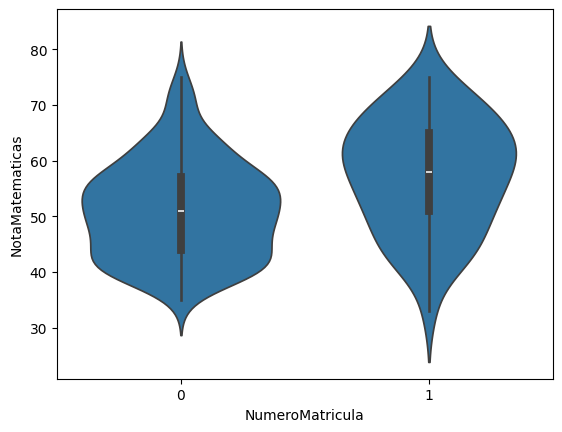

In [280]:
# a. Gráfico de violín
sns.violinplot(x='NumeroMatricula', y='NotaMatematicas', data=data);

In [281]:
X = data[['NumeroMatricula']].values
y = data[['NotaMatematicas']].values

In [282]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [283]:
lr.score(X,y)

0.08143976373664852

In [284]:
# c. Modelo de regresión lineal con OLS
import statsmodels.api as sm
X = sm.add_constant(X) # Añadir columna de unos para el término independiente
modelOls = sm.OLS(y, X).fit()


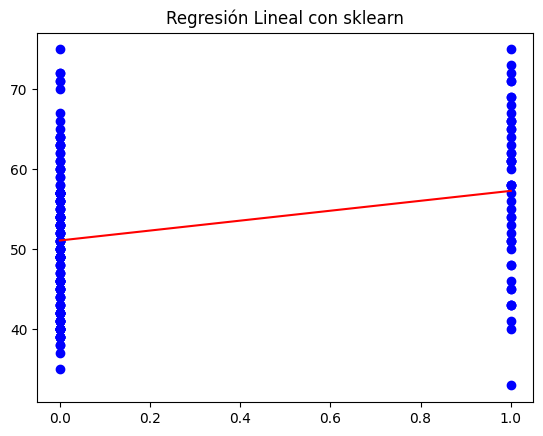

In [285]:
# Regresión lineal con sklearn
plt.scatter(data['NumeroMatricula'], data['NotaMatematicas'], color='blue', label='Datos')
plt.plot(data['NumeroMatricula'], lr.predict(data['NumeroMatricula'].values.reshape(-1, 1)), color='red', label='Regresión lineal')
plt.title('Regresión Lineal con sklearn');

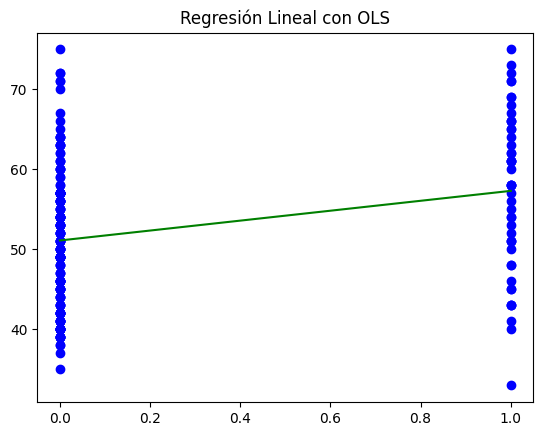

In [286]:
# Regresión lineal con OLS
plt.scatter(data['NumeroMatricula'], data['NotaMatematicas'], color='blue', label='Datos')
plt.plot(data['NumeroMatricula'], modelOls.predict(X), color='green', label='Regresión lineal');
plt.title('Regresión Lineal con OLS');

In [287]:
# Imprimir los coeficientes de ambos modelos
print("Coeficientes del modelo de regresión lineal con sklearn:")
print("Intercepto:", lr.intercept_)
print("Pendiente:", lr.coef_[0])
print("\nCoeficientes del modelo de regresión lineal con OLS:")
print(modelOls.params)

Coeficientes del modelo de regresión lineal con sklearn:
Intercepto: [51.12582781]
Pendiente: [6.2007028]

Coeficientes del modelo de regresión lineal con OLS:
[51.12582781  6.2007028 ]


In [288]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as LR

# Definir los datos de entrada (X) y la variable de respuesta (y)
numero_matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                             0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                             0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                             0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                             1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                             1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                             0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                             0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                             1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                             0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                             0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

notas_matematicas = np.array([41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                               51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                               63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                               63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                               50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                               57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                               72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                               57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                               56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                               58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                               53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                               63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                               53, 42, 60, 52, 38, 57, 58, 65])

# Convertir los datos a un DataFrame
data1 = pd.DataFrame({'NumeroMatricula': numero_matricula, 'NotaMatematicas': notas_matematicas})

# Separar los datos en variables de entrada (X) y variable de salida (y)
X = data1[['NotaMatematicas']] 
y = data1[['NumeroMatricula']]  

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.2, random_state=0)

# Convertir y_train a un array NumPy y luego aplanarlo
y_train = np.array(y_train).ravel()

# Escalar los datos
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))

# Crear y entrenar el clasificador de regresión logística
clasificador = LR(random_state=0)
clasificador.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [289]:
y_pred = clasificador.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [290]:
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test, y_pred)
cm

array([[26,  0],
       [14,  0]], dtype=int64)

In [291]:
clasificador.score(X_train,y_train)

0.78125

In [ ]:
x1 = np.arange(len(y_pred))
plt.scatter(x1, (y-y_pred,c='skyblue'))
plt.plot([0,len(y_pred)], [0,0], 'b-')
error = mean_squared_error(y,y_pred)  
print(error)

plt.plot([0, len()y_pred])